___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2024
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg</p>

### <font color= #2E9AFE> Tema: XGBoost - Regresión</font>

### Hiperparámetros

1. **eta (learning_rate)**: rango: [0,1] Es un parámetro que evita el sobreajuste.
2. **min_child_weight** : rango: [0,∞] En la tarea de regresión, esto corresponde al número mínimo de observaciones necesarias para cada nodo. Se utiliza para controlar el sobreajuste.
3. **max_depth**: rango: [0,∞] Profundidad máxima de un árbol. Aumentar este valor hará que el modelo sea más complejo y sea más probable que se sobreajuste. 0 indica que no hay límite de profundidad. Ten en cuenta que XGBoost consume memoria de forma agresiva al entrenar un árbol muy profundo. Se suele recomendar tomar valores entre 3 y 10.
4. **gamma**: rango: [0,∞] método para podar "prune" el árbol
5. **lambda**: Dado que el valor lambda está en el denominador de la similitud, a medida que la lambda aumenta, la similitud disminuirá y, por lo tanto, esto también disminuirá la ganancia. Esto permite una mayor poda, solo se conservan y sobreajustan las ramas con una puntuación de ganancia alta. 

## Ejercicio

Los datos los podemos obtener de: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

El conjunto de datos contiene 9568 datos recopilados de una central eléctrica durante 6 años (2006-2011), cuando la central eléctrica estaba configurada para funcionar a plena carga.

Una central eléctrica de ciclo combinado (CCPP) está compuesta por turbinas de gas, turbinas de vapor y generadores de vapor con recuperación de calor. En una CCPP, la electricidad se genera mediante turbinas de gas y de vapor, que se combinan en un ciclo, y se transfiere de una turbina a otra. 


Columnas disponibles (promedio por hora):
- AT: Temperatura
- V: Vacío de Escape
- AP: Presión Ambiental
- RH: Humedad Relativa
- PE: Producción neta de energía eléctrica.

Power output (energía) es la variable a predecir

In [7]:
#pip install xgboost

In [8]:
#Librerías
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#Cargar datos
datos = pd.read_excel("Folds5x2_pp.xlsx")

In [10]:
#vistazo de los datos
datos.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [11]:
#tamaño de los datos
datos.shape

(9568, 5)

In [12]:
#tipo de datos
datos.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [13]:
#valores nulos?
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


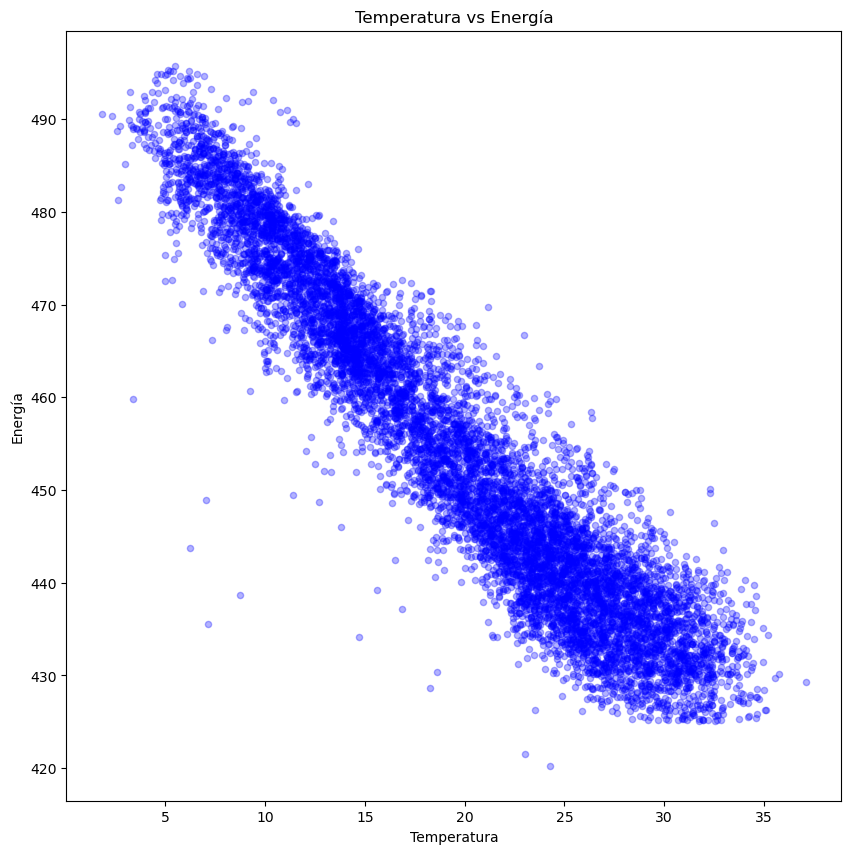

In [14]:
# Relación entre variable de salida y la temperatura
datos.plot(x ='AT', y = 'PE', kind ="scatter", 
                 figsize = [10,10],
                 color ="b", alpha = 0.3)
plt.title("Temperatura vs Energía")
plt.xlabel("Temperatura") 
plt.ylabel("Energía")
plt.show()

#Existe una correlación *negativa* entre la temperatura y la energía

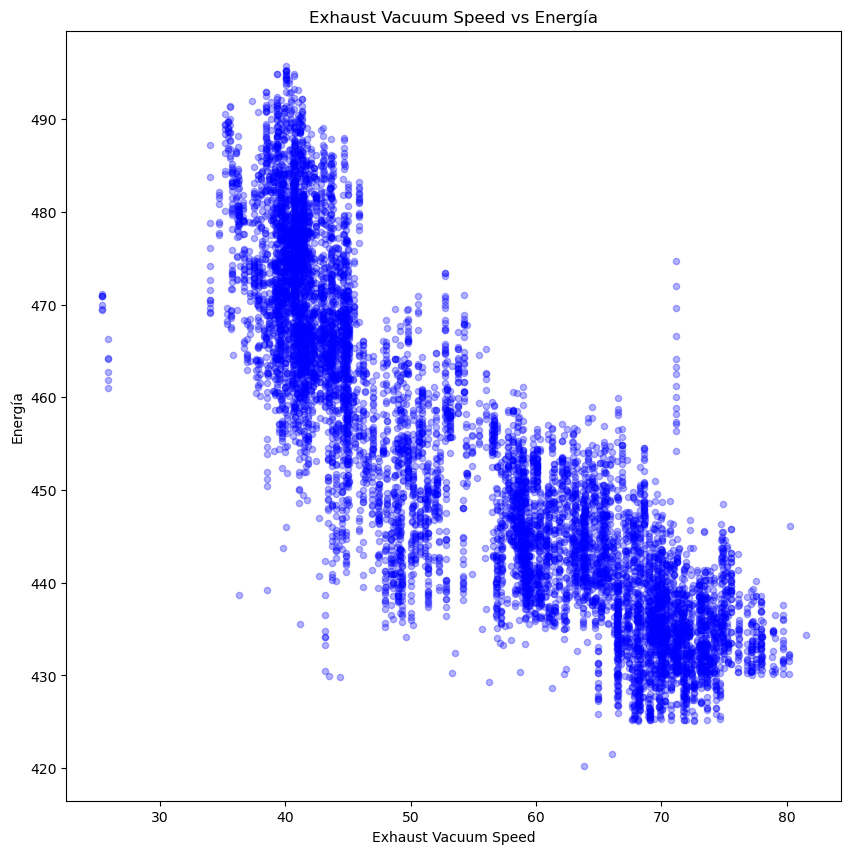

In [15]:
# Relación entre variable de salida y el Exhaust Vacuum Speed
datos.plot(x ='V', y = 'PE', kind ="scatter", 
                 figsize = [10,10],
                 color ="b", alpha = 0.3)
plt.title("Exhaust Vacuum Speed vs Energía")
plt.xlabel("Exhaust Vacuum Speed") 
plt.ylabel("Energía")
plt.show()

#Existe una correlación *negativa* entre la energia y el Exhaust Vacuum Speed

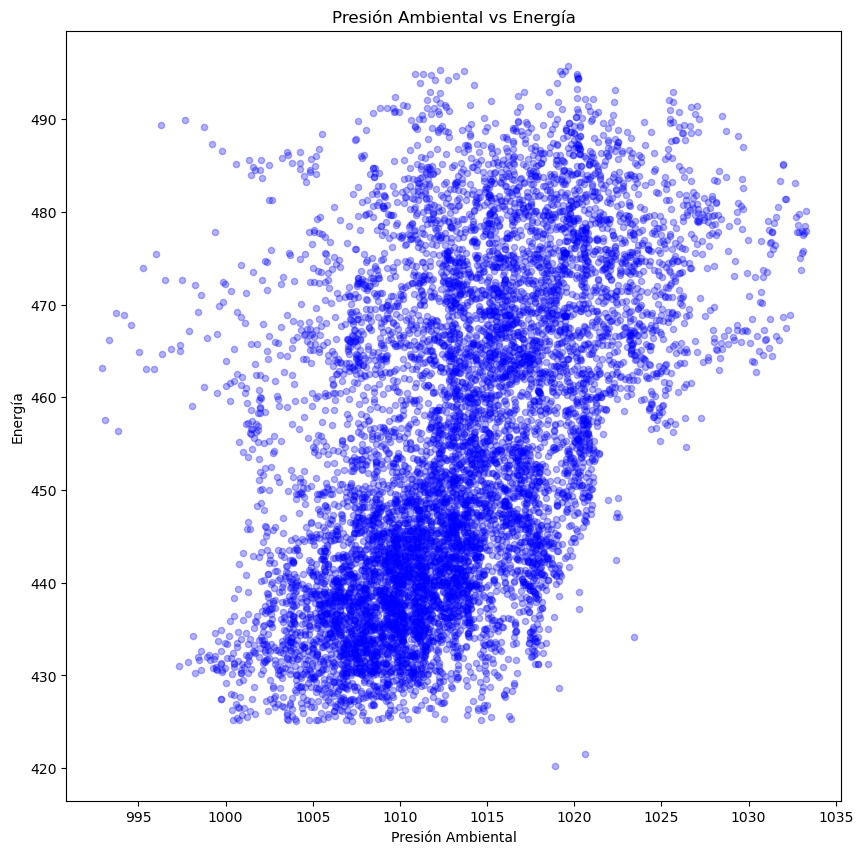

In [16]:
# Relación entre variable de salida y la Presión Ambiental
datos.plot(x ='AP', y = 'PE', kind ="scatter", 
                 figsize = [10,10],
                 color ="b", alpha = 0.3)
plt.title("Presión Ambiental vs Energía")
plt.xlabel("Presión Ambiental") 
plt.ylabel("Energía")
plt.show()

#Existe una correlación *positiva* débil entre la energía y la presión ambiental

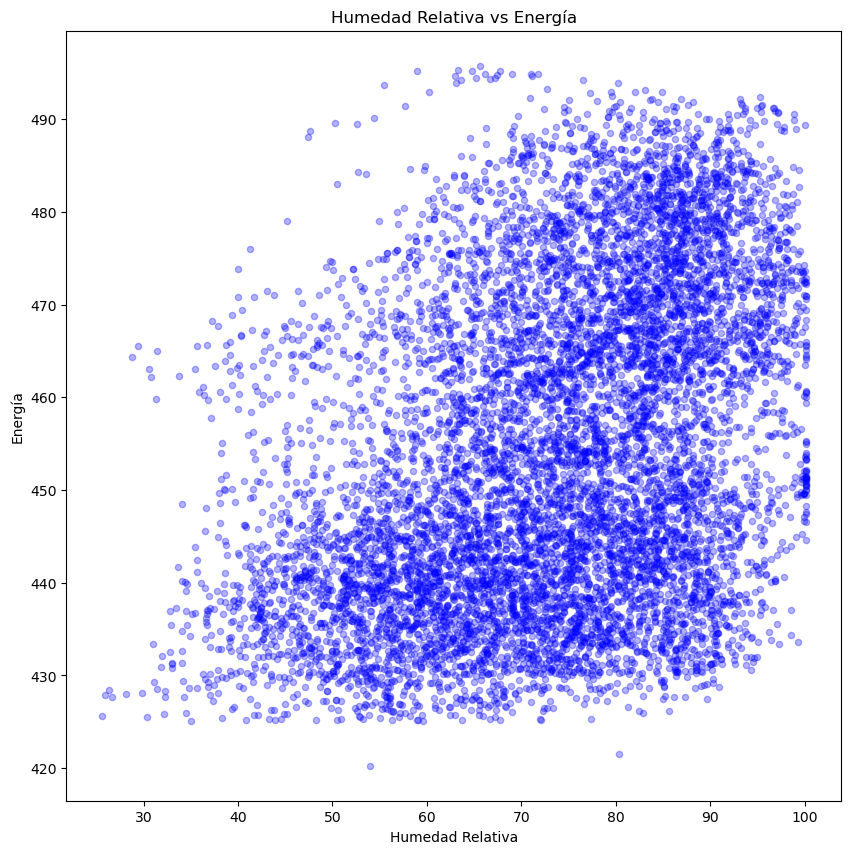

In [17]:
# Relación entre variable de salida y la Presión Ambiental
datos.plot(x ='RH', y = 'PE', kind ="scatter", 
                 figsize = [10,10],
                 color ="b", alpha = 0.3)
plt.title("Humedad Relativa vs Energía")
plt.xlabel("Humedad Relativa") 
plt.ylabel("Energía")
plt.show()

#Existe una correlación *positiva* débil entre la energía y la humedad relativa

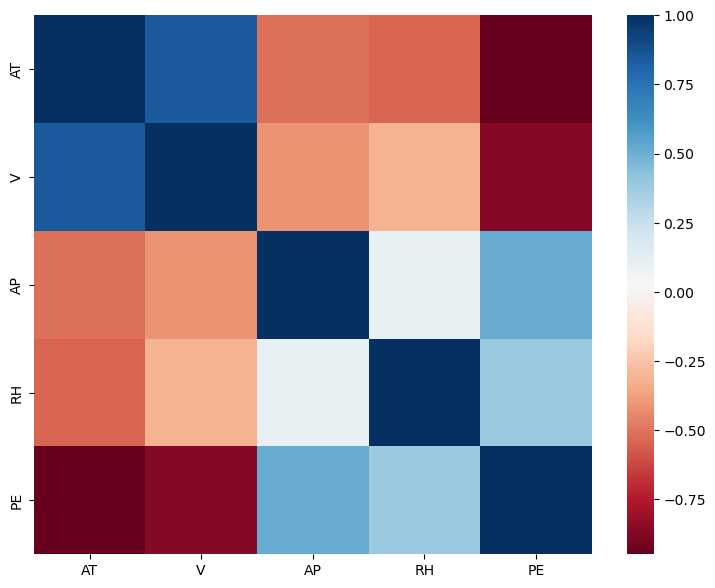

In [18]:
# gráfico de correlacion
corr = datos.corr()
plt.figure(figsize = (9, 7))
sns.heatmap(corr, cmap="RdBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [19]:
#Separar nuestras X de las Y
X = datos.drop("PE", axis = 1).values
y = datos['PE'].values
y = y.reshape(-1, 1)

#Dividiendo los datos en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                               test_size = 0.2, 
                                               random_state=42)



In [20]:
#Construir el xgboost
#inicializar objeto de regresión
modelo = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

#Entrenar modelo
modelo.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
import sklearn.metrics as metrics
#predicciones
y_hat= modelo.predict(X_test)

#medidas de performance
r2 = metrics.r2_score(y_test,y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)
print('R2:',r2)
print("MSE:",mse)

R2: 0.9686406948910005
MSE: 9.096016691339907


Si quieremos optimizar los hiperparámetros del modelo podemos utilizar grid search  + crossvalidation

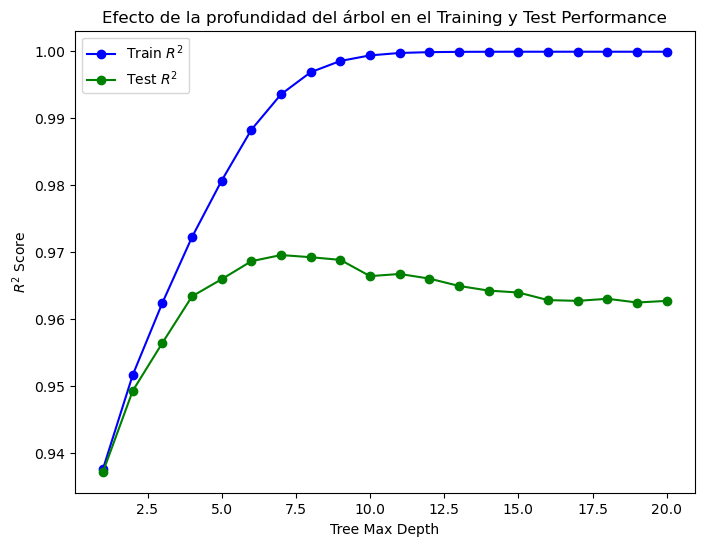

In [22]:
#graficamos la profundidad vs la R2
max_depths = range(1, 21)
train_scores = []
test_scores = []

for max_depth in max_depths:   
    tree_reg = xgb.XGBRegressor(max_depth=max_depth, objective='reg:squarederror', seed=42)
    tree_reg.fit(X_train, y_train)
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(max_depths, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(max_depths, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la profundidad del árbol en el Training y Test Performance')
plt.legend()
plt.show()

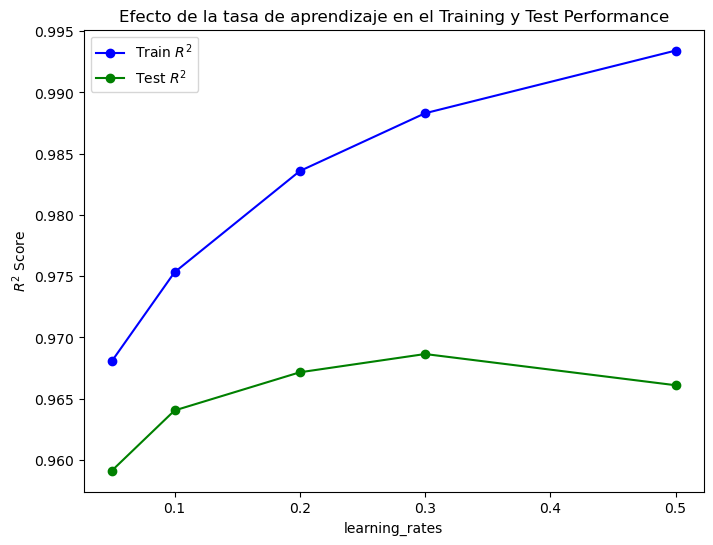

In [23]:
#graficamos la eta (learning_rate) vs la R2
learning_rates = [0.05, 0.1, 0.2, 0.3, 0.5]
train_scores = []
test_scores = []

for learning_rate in learning_rates:   
    tree_reg = xgb.XGBRegressor(learning_rate=learning_rate, objective='reg:squarederror', seed=42)
    tree_reg.fit(X_train, y_train)
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(learning_rates, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('learning_rates')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la tasa de aprendizaje en el Training y Test Performance')
plt.legend()
plt.show()

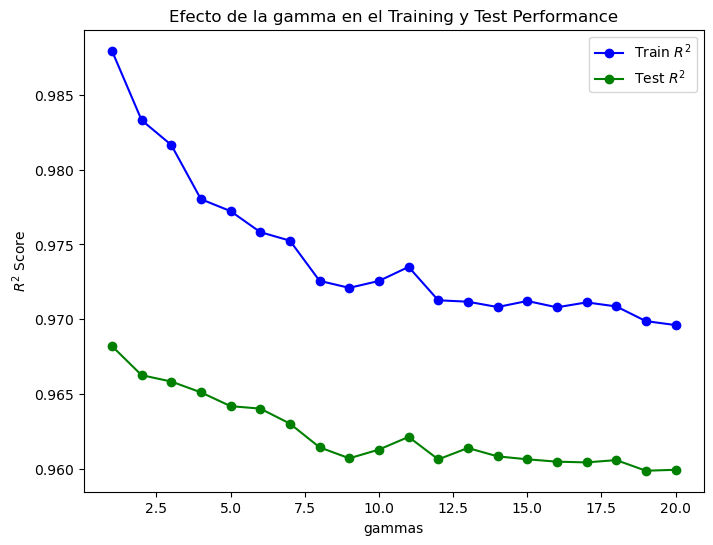

In [24]:
#graficamos la gamma vs la R2
gammas = range(1, 21)
train_scores = []
test_scores = []

for gamma in gammas:   
    tree_reg = xgb.XGBRegressor(gamma=gamma, objective='reg:squarederror', seed=42)
    tree_reg.fit(X_train, y_train)
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(gammas, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(gammas, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('gammas')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la gamma en el Training y Test Performance')
plt.legend()
plt.show()

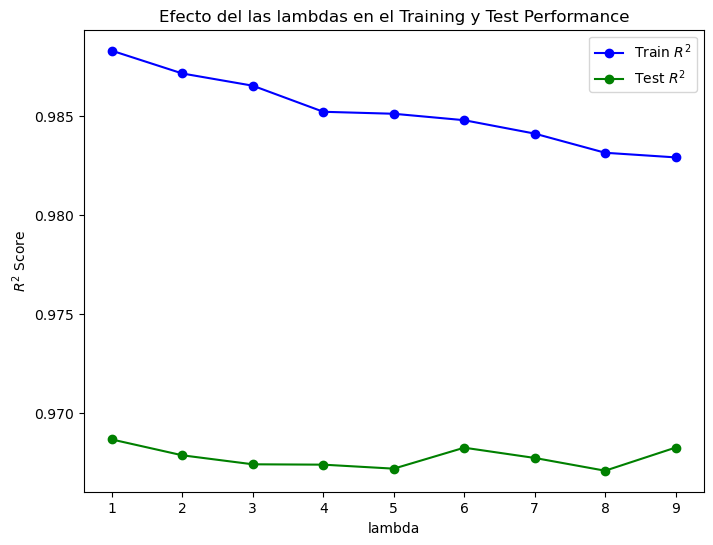

In [25]:
#graficamos la lambda vs la R2
lambdas = range(1, 10)
train_scores = []
test_scores = []

for l in lambdas:
    tree_reg = xgb.XGBRegressor(reg_lambda=l, objective='reg:squarederror', seed=42)
    tree_reg.fit(X_train, y_train)
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(lambdas, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(lambdas, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('lambda')
plt.ylabel('$R^2$ Score')
plt.title('Efecto del las lambdas en el Training y Test Performance')
plt.legend()
plt.show()

In [26]:
#Parámetros para el grid search
gbm_param_grid = {
     'reg_lambda': [5,6,7] , 
     'gamma': [8,9,10,11,12],
     'learning_rate': [0.05, 0.1, 0.2],
     'max_depth': [1, 2, 3, 4, 5]
}
#Iniciar el modelo
gbm = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

#Hacer el grid search
grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 2, verbose = 1)

#Ajustar a los datos de entrenamiento
grid_mse.fit(X_train, y_train)


Fitting 2 folds for each of 225 candidates, totalling 450 fits


C:\Users\maxag\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [8, 9, 10, 11, 12],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [1, 2, 3, 4, 5],
                         'reg_lambda': [5, 6, 7]},
             scoring='neg_mean_squared_error', verbose=1)

In [27]:
print("Mejores hiperparámetros encontrados: ",grid_mse.best_params_)

Mejores hiperparámetros encontrados:  {'gamma': 9, 'learning_rate': 0.2, 'max_depth': 5, 'reg_lambda': 5}


In [28]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
modelo_nuevo = xgb.XGBRegressor(objective='reg:squarederror',
                           seed=42,
                           max_depth=5,
                           gamma=9,
                           learning_rate = 0.2,
                           reg_lambda=5)

#Entrenar modelo
modelo_nuevo.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=9, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
#predecir
y_hat= modelo_nuevo.predict(X_test)

#metricas de performance
r2 = metrics.r2_score(y_test,y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)
print('R2:',r2)
print("MSE:",mse)

R2: 0.9604668350497485
MSE: 11.466909964971926


**Ventajas**
- Modelo muy efectivo con bases de datos grandes y complejas
- No necesita escalamiento de variables
- Funciona bien con datos no lineales
- Modelo que muestra la importancia de las variables
- Tiene una herramienta interna para trabajar con datos nulos

**Desventajas**
- Modelo de Caja negra -> no se puede interpretar
- Es más difícil tunear los hiperparámetros
- Modelo sensible a datos atípicos